In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.11.0'

In [3]:
keras.__version__

'2.11.0'

# Train / Test Split

## keras

### .datasets.fashion_mnist

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

#### .load_data()

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full # each value ranging from 0 to 255

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full # 10 classes represented as integers (multiclass, 0-9)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_train_full.shape

(60000,)

# Validation Set Split

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [11]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

# Class names

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

# Model Training

## keras.models.Sequential()

In [17]:
model = keras.models.Sequential()

### .add()

In [18]:
import warnings
warnings.filterwarnings("ignore")

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### .summary()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### .layers

In [20]:
model.layers

#### .get_weights()

In [21]:
weights, biases = model.layers[1].get_weights()

In [22]:
weights

array([[-0.03974065,  0.07011969, -0.02784171, ..., -0.04845849,
        -0.02242283, -0.04524975],
       [ 0.06390429,  0.04480818, -0.03078697, ...,  0.04501454,
        -0.06155246,  0.06548457],
       [ 0.06214444, -0.00783958,  0.04011533, ...,  0.07360041,
        -0.06926542, -0.02430769],
       ...,
       [-0.05552732,  0.06300749,  0.06652245, ..., -0.02947749,
         0.07242543,  0.00799304],
       [ 0.05403936,  0.03358026,  0.02016649, ...,  0.00327196,
         0.03762197, -0.02810467],
       [-0.06459603, -0.02624945, -0.04062472, ..., -0.04782429,
        -0.06126254, -0.0449758 ]], dtype=float32)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### .compile()

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### .fit()

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7212 - accuracy: 0.7614 - val_loss: 0.5180 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4896 - accuracy: 0.8296 - val_loss: 0.4470 - val_accuracy: 0.8454
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4449 - accuracy: 0.8445 - val_loss: 0.4166 - val_accuracy: 0.8566
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4170 - accuracy: 0.8524 - val_loss: 0.4029 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3979 - accuracy: 0.8586 - val_loss: 0.3894 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3814 - accuracy: 0.8645 - val_loss: 0.3793 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3691 - accuracy: 0.8699 - val_loss: 0.3615 - val_ac

#### .history

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.721236,0.761382,0.517971,0.8246
1,0.489631,0.829618,0.447004,0.8454
2,0.444909,0.844473,0.416631,0.8566
3,0.417033,0.852400,0.402881,0.8592
4,0.397943,0.858564,0.389398,0.8648
5,0.381433,0.864509,0.379314,0.8658
6,0.369109,0.869945,0.361453,0.8718
7,0.356330,0.873691,0.379417,0.8662
8,0.346746,0.877436,0.352314,0.8746
9,0.335590,0.880709,0.361532,0.8730


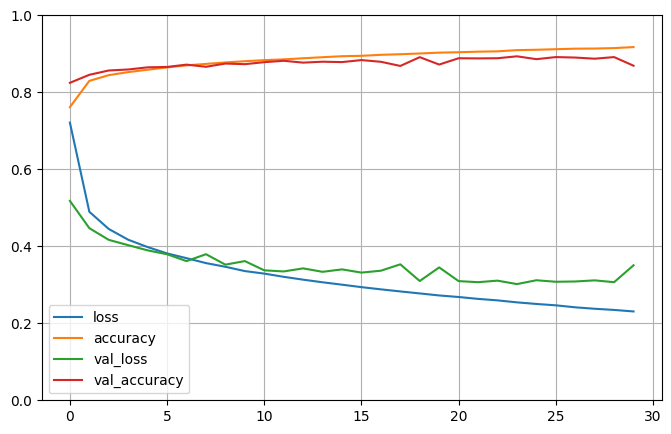

In [27]:
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y-axis values ranges from 0-1
plt.show()

### .evaluate()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 60.8463 - accuracy: 0.8462


[60.846256256103516, 0.8461999893188477]

### .predict()

In [29]:
X_sample = X_test[:3]
X_sample

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [30]:
X_sample.shape

(3, 28, 28)

In [ ]:
y_proba = model.predict(X_sample) # sparse-categorical (the output is onehot encoded)
y_proba

1/1 [==============================] - 0s 383ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### .predict_classes()

In [32]:
import numpy as np

y_pred = model.predict(X_sample)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[y_pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Model Selection

## Save Model

### Save entire model

In [ ]:
model.save("models/outfit_classifier")

In [ ]:
model.save("models/outfit_classifier.h5")

### Save model weights

In [38]:
model.save_weights("models/outfit_classifier_model_weights.h5")

## Import model

### Load entire model

In [39]:
from tensorflow.keras.models import load_model

loaded_model =  load_model("models/outfit_classifier")
loaded_model

In [48]:
loaded_model.layers

In [49]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Load model weights only

- Unlike loading the whole model, we have to recreate the architecture and pass the loaded weights (latest_state).

In [44]:
import tensorflow as tf

loaded_model_v2 = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

loaded_model_v2.load_weights("models/outfit_classifier_model_weights.h5")

In [47]:
loaded_model_v2.layers

In [50]:
loaded_model_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Test model

In [ ]:
import os
import numpy as np
from PIL import Image

def load_images_from_directory(directory, target_size=(28, 28)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize(target_size)  # Resize image to target size (28, 28)
            img = np.array(img) # Convert to an array
            img = 255 - img # Scale the values of the pixels 
            images.append(img)
    return np.array(images)

images_array = load_images_from_directory("images")

In [52]:
shirt = images_array[0]
shirt

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,  20,  52, 107,  85,
         72,  70,  87, 101,  45,  17,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  17,  60, 105, 135, 145, 184, 206,
        118, 154, 200, 172, 150, 139, 107,  55,   9,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,  62, 128, 146, 145, 142, 142, 148, 181,
        140, 163, 174, 153, 154, 157, 160, 159, 133,  37,   0,   0,   0,
          0,   0],
       [  

In [53]:
shirt.shape

(28, 28)

In [ ]:
predictions = loaded_model.predict(images_array) # takes in 3D shape (n, 28, 28)
predictions

1/1 [==============================] - 0s 76ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [60]:
predicted_classes = np.argmax(predictions, axis = 1)
predicted_classes 

array([6], dtype=int64)

In [ ]:
np.array(class_names)[predicted_classes] # as you can see, it predicted correctly

array(['Shirt'], dtype='<U11')